# 2.3 Lab: Introduction to Python

This notebook file is intended to be a translation of the R lab included in Chapter 2.


## Installation
There are multiple ways to get a notebook environment working. The easiest is probably to install Anaconda and work off of that premade setup.

However, I personally recommend using ASDF to install versions of Python and using Poetry to manage package dependencies. This is because I tend to use separate environments for each project I'm working on (including this one) and I previously had problems with `conda` installs.

Please look at the README.md in the base of the repository to see how to install things.


## 2.3.1 Basic Commands
Python is handy but doesn't appear to have the same functionality as built into R. To better address matrix math and statistical calculations, I will be using numpy, pandas, and scipy (specifically the stats module from scipy)

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

Python can use functions to perform operations. To run a function, you type `funcname` with its inputs in parenthesis. A function can have any number of inputs, and it is best practice to load the function's documentation to see specifics on how it operates. As an example, we will use numpy to create an array from 4 integers. If you want to see specific documentation on this function, you can checkout the `numpy.array` manual here: https://numpy.org/doc/stable/reference/generated/numpy.array.html 

In [11]:
help(np.array)

Help on built-in function array in module numpy:

array(...)
    array(object, dtype=None, *, copy=True, order='K', subok=False, ndmin=0,
          like=None)
    
    Create an array.
    
    Parameters
    ----------
    object : array_like
        An array, any object exposing the array interface, an object whose
        __array__ method returns an array, or any (nested) sequence.
        If object is a scalar, a 0-dimensional array containing object is
        returned.
    dtype : data-type, optional
        The desired data-type for the array.  If not given, then the type will
        be determined as the minimum type required to hold the objects in the
        sequence.
    copy : bool, optional
        If true (default), then the object is copied.  Otherwise, a copy will
        only be made if __array__ returns a copy, if obj is a nested sequence,
        or if a copy is needed to satisfy any of the other requirements
        (`dtype`, `order`, etc.).
    order : {'K', 'A', '

In [2]:
x = np.array([1, 3, 2, 5])
print(x)

[1 3 2 5]


Let's create another array and perform some operations on them

In [3]:
y = np.array([1, 4, 3])
print(y)

[1 4 3]


In [4]:
# Here we'll use a built in Python function to tell us the about the arrays
len(x) # give us a count of elements inside the array

4

In [5]:
len(y)  # similarly with the vector y

3

The `dir()` function allows us to look at a list of all objects, such as data and functions, that are in our current scope. Basically, things we have saved so far. The `del` function can remove pointers to specific objects to free up memory.

In [12]:
help(dir)

Help on built-in function dir in module builtins:

dir(...)
    dir([object]) -> list of strings
    
    If called without an argument, return the names in the current scope.
    Else, return an alphabetized list of names comprising (some of) the attributes
    of the given object, and of attributes reachable from it.
    If the object supplies a method named __dir__, it will be used; otherwise
    the default dir() logic is used and returns:
      for a module object: the module's attributes.
      for a class object:  its attributes, and recursively the attributes
        of its bases.
      for any other object: its attributes, its class's attributes, and
        recursively the attributes of its class's base classes.



In [7]:
dir()

['In',
 'Out',
 '_',
 '_4',
 '_5',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__vsc_ipynb_file__',
 '_dh',
 '_i',
 '_i1',
 '_i2',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'all_vars',
 'exit',
 'get_ipython',
 'name',
 'np',
 'os',
 'quit',
 'site',
 'stats',
 'sys',
 'x',
 'y']

In [6]:
all_vars = dir()
for name in all_vars:
    if not name.startswith('__'):
        print(eval(name))

['', 'import numpy as np\nfrom scipy import stats', 'x = np.array([1, 3, 2, 5])\nprint(x)', 'y = np.array([1, 4, 3])\nprint(y)', "# Here we'll use a built in Python function to tell us the about the arrays\nlen(x) # give us a count of elements inside the array", 'len(y)  # similarly with the vector y', "all_vars = dir()\nfor name in all_vars:\n    if not name.startswith('__'):\n        print(eval(name))"]
{4: 4, 5: 3}
3
4
3
[PosixPath('/home/awchen/Repos/courses/intro_stat_learning/notebooks')]
len(y)  # similarly with the vector y
import numpy as np
from scipy import stats
x = np.array([1, 3, 2, 5])
print(x)
y = np.array([1, 4, 3])
print(y)
# Here we'll use a built in Python function to tell us the about the arrays
len(x) # give us a count of elements inside the array
len(y)  # similarly with the vector y
all_vars = dir()
for name in all_vars:
    if not name.startswith('__'):
        print(eval(name))
['', 'import numpy as np\nfrom scipy import stats', 'x = np.array([1, 3, 2, 5])\npr

In [16]:
help(del)

SyntaxError: invalid syntax (712162343.py, line 1)

See https://docs.python.org/3/reference/simple_stmts.html#del

In [8]:
del x, y

In [9]:
dir()

['In',
 'Out',
 '_',
 '_4',
 '_5',
 '_7',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__vsc_ipynb_file__',
 '_dh',
 '_i',
 '_i1',
 '_i2',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'all_vars',
 'exit',
 'get_ipython',
 'name',
 'np',
 'os',
 'quit',
 'site',
 'stats',
 'sys']

Because of how `dir()` returns all things in local scope, I will not try to remove all objects at once.

The `numpy.mat()` function can be used to create a matrix of numbers. Let's see what the documentation says:

In [17]:
help(np.mat)

Help on function asmatrix in module numpy:

asmatrix(data, dtype=None)
    Interpret the input as a matrix.
    
    Unlike `matrix`, `asmatrix` does not make a copy if the input is already
    a matrix or an ndarray.  Equivalent to ``matrix(data, copy=False)``.
    
    Parameters
    ----------
    data : array_like
        Input data.
    dtype : data-type
       Data-type of the output matrix.
    
    Returns
    -------
    mat : matrix
        `data` interpreted as a matrix.
    
    Examples
    --------
    >>> x = np.array([[1, 2], [3, 4]])
    
    >>> m = np.asmatrix(x)
    
    >>> x[0,0] = 5
    
    >>> m
    matrix([[5, 2],
            [3, 4]])



According to StackOverflow discussion (https://stackoverflow.com/questions/4151128/what-are-the-differences-between-numpy-arrays-and-matrices-which-one-should-i-u) `numpy` arrays are N-dimensional but `matrices` are 2-dimensional. May be better to just stick with `numpy.array`

In [19]:
x = np.array([[1, 2], [3,4]])
print(x)

[[1 2]
 [3 4]]


In [21]:
x = np.array([[1, 3], [2, 4]])
print(x)

[[1 3]
 [2 4]]


The `np.sqrt()` function returns the square root of each element of a vector or matrix. 

In [23]:
print(np.sqrt(x))

[[1.         1.73205081]
 [1.41421356 2.        ]]


The `np.power()` function raises each element of x to a specified power

In [24]:
print(np.power(x, 2))

[[ 1  9]
 [ 4 16]]


In [25]:
help(stats.norm)

Help on norm_gen in module scipy.stats._continuous_distns object:

class norm_gen(scipy.stats._distn_infrastructure.rv_continuous)
 |  norm_gen(momtype=1, a=None, b=None, xtol=1e-14, badvalue=None, name=None, longname=None, shapes=None, extradoc=None, seed=None)
 |  
 |  A normal continuous random variable.
 |  
 |  The location (``loc``) keyword specifies the mean.
 |  The scale (``scale``) keyword specifies the standard deviation.
 |  
 |  %(before_notes)s
 |  
 |  Notes
 |  -----
 |  The probability density function for `norm` is:
 |  
 |  .. math::
 |  
 |      f(x) = \frac{\exp(-x^2/2)}{\sqrt{2\pi}}
 |  
 |  for a real number :math:`x`.
 |  
 |  %(after_notes)s
 |  
 |  %(example)s
 |  
 |  Method resolution order:
 |      norm_gen
 |      scipy.stats._distn_infrastructure.rv_continuous
 |      scipy.stats._distn_infrastructure.rv_generic
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  fit(self, data, **kwds)
 |      Return estimates of shape (if applicable), locat

## Using numpy functions

In [28]:
# Using numpy
x1_np = np.random.standard_normal(50)
print(x1_np)
print(x1_np.shape)

[-0.83932439  0.08278839 -0.40147848 -0.58048401  0.73436277  0.52508405
 -0.49100123 -0.32884716 -1.59383447  0.70452067 -1.18749926  1.13777281
 -0.57258205  0.16010034 -0.48512572  0.12619031  0.2568721   1.09710681
 -0.55328068  1.75089001  0.60412947  0.2093287  -0.32466072  0.57769704
  0.81712315 -0.21392306  0.13420702 -0.01665613 -2.31854891  0.83385611
  0.43514789 -1.07154998  0.27450583  1.22894007  0.17312277 -2.04871413
 -0.73716174  0.1644214  -1.63068509 -0.90945952  1.04926941  0.77656223
  1.37569289  0.87752549  0.8021509   0.21264586 -0.14989467 -0.72558409
  0.26615611 -0.23149548]
(50,)


In [29]:
y1_np = x1_np + np.random.normal(loc=50, scale=0.1, size=50)
print(y1_np)
print(y1_np.shape)

[49.16164155 50.01181518 49.73254823 49.28390645 50.93359079 50.60413954
 49.61304238 49.68608119 48.35187101 50.74103567 48.90048484 51.11224762
 49.68404713 50.13371696 49.50998412 49.98883732 50.25807695 50.95073796
 49.23745435 51.85410958 50.68815857 50.14450148 49.73335869 50.6407095
 50.7818527  49.80580782 50.07687136 49.85718653 47.50318373 50.88909819
 50.51561279 49.02432538 50.10868234 51.11371023 50.2779942  47.9938668
 49.45008837 50.16635215 48.50724483 48.95958443 51.07186279 50.77104916
 51.33764534 50.75960681 50.98346563 50.2500991  49.77192306 49.42326181
 50.18292208 49.74216128]
(50,)


In [32]:
np.corrcoef(x1_np, y1_np)

array([[1.        , 0.99252437],
       [0.99252437, 1.        ]])

## Using scipy stats functions

In [30]:
x1_scipy = stats.norm.rvs(loc=0, scale=0.1, size=50)
print(x1_scipy)
print(x1_scipy.shape)

[-0.06354821 -0.0198979  -0.08674454 -0.08839506 -0.08402619 -0.05691692
 -0.00524887 -0.06241087 -0.01004087 -0.10128066 -0.09541257  0.01824257
  0.03856474  0.18652789 -0.09649839  0.03655244  0.10024174 -0.28207564
  0.05024792 -0.02431141  0.21349778  0.06086431 -0.00743085  0.04899415
  0.07923346 -0.06873101  0.10987069 -0.06040236 -0.26210301 -0.10516868
  0.14164518  0.1050183   0.05068448  0.06949572 -0.09883475  0.05793261
  0.05694929  0.01131075 -0.06089941 -0.02006902 -0.06041356 -0.10468074
 -0.08404871 -0.01115902  0.02753673 -0.05596168  0.03274561  0.0449953
 -0.2183621   0.06789086]
(50,)


In [31]:
y1_scipy = x1_scipy + stats.norm.rvs(loc=50, scale=0.1, size=50)
print(y1_scipy)
print(y1_scipy.shape)

[49.99865567 49.95915608 49.82784468 49.70235396 49.83159077 50.08830082
 49.98832109 49.94707038 50.08434146 50.02470969 49.85228582 49.84141742
 50.03425089 50.24644363 50.02712256 50.06722863 50.08615799 49.79439145
 50.19149472 50.05242323 50.15153483 50.13740941 50.12580268 50.06704128
 50.10268271 49.87773219 49.88251687 49.80037861 49.66508447 49.95219444
 50.07217033 50.18733446 50.01947545 50.19720574 49.78037169 49.83117185
 49.99446962 49.88578958 50.07620729 49.79559962 49.82645957 50.03016216
 49.75270567 50.04931308 50.03891842 50.00453461 50.04888975 49.99067327
 49.68651338 49.99117408]
(50,)


In [33]:
stats.pearsonr(x1_scipy, y1_scipy)

(0.6747794812748894, 7.714290039724842e-08)

In [20]:
from numpy.random import MT19937
from numpy.random import RandomState, SeedSequence
rs = RandomState(MT19937(SeedSequence(1303)))

In [21]:
y = np.random.standard_normal(100)
print(np.mean(y))
print(np.var(y))
print(np.sqrt(np.var(y)))
print(np.std(y))

0.077135407175952
1.1043964345020698
1.0509026760371627
1.0509026760371627


In [22]:
from matplotlib import pyplot as pltx

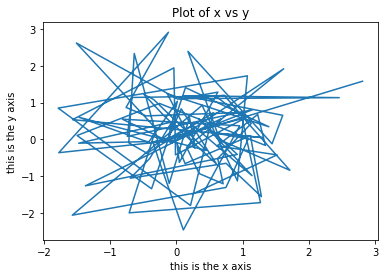

In [23]:
x = np.random.standard_normal(100)
y = np.random.standard_normal(100)

plt.xlabel("this is the x axis")
plt.ylabel('this is the y axis')
plt.title("Plot of x vs y")
plt.plot(x,y)
plt.show()

In [24]:
x = np.arange(1,11)
print(x)

[ 1  2  3  4  5  6  7  8  9 10]


In [28]:
x = np.linspace(-np.pi, np.pi, 50)
print(x)

[-3.14159265 -3.01336438 -2.88513611 -2.75690784 -2.62867957 -2.5004513
 -2.37222302 -2.24399475 -2.11576648 -1.98753821 -1.85930994 -1.73108167
 -1.60285339 -1.47462512 -1.34639685 -1.21816858 -1.08994031 -0.96171204
 -0.83348377 -0.70525549 -0.57702722 -0.44879895 -0.32057068 -0.19234241
 -0.06411414  0.06411414  0.19234241  0.32057068  0.44879895  0.57702722
  0.70525549  0.83348377  0.96171204  1.08994031  1.21816858  1.34639685
  1.47462512  1.60285339  1.73108167  1.85930994  1.98753821  2.11576648
  2.24399475  2.37222302  2.5004513   2.62867957  2.75690784  2.88513611
  3.01336438  3.14159265]


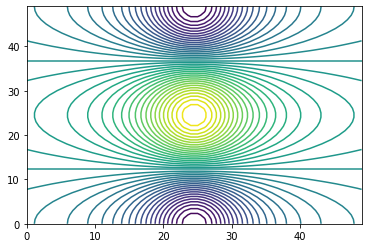

In [37]:
x = np.linspace(-np.pi, np.pi, 50)
y = x.reshape(-1,1)
f = np.cos(y) / (1+np.power(x,2))
# print(f)
plt.contour(f, levels=45)